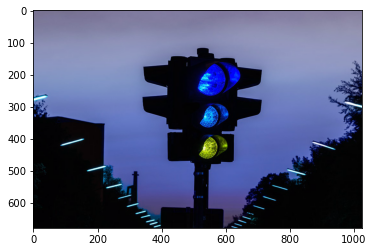

In [ ]:
import numpy
import pandas
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

image = cv2.imread("trafficlight.jpg")
imgplot = plt.imshow(numpy.real(image))
plt.show()
image = cv2.resize(image, (600, 400))
r = g = b = 0
mouse_scroll = False
csv_file = pandas.read_csv('colors.csv', names = ["Red", "Green", "Blue", "color_name"])

def mouse_event(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE:
        global r, g, b, mouse_scroll
        mouse_scroll = True
        b, g, r = image[y,x]
        r = int(r)
        g = int(g)
        b = int(b)
        
cv2.namedWindow('color labelling')
cv2.setMouseCallback('color labelling', mouse_event)

while True:
        cv2.imshow("color labelling",image)
        #(r,)(w,h)
        cv2.rectangle(image, (90,310), (560,370), (b,g,r), -1)
        min_val = math.inf
        file_len = len(csv_file)
        for i in range(file_len):
            d = abs(r - int(csv_file.loc[i, "Red"])) + abs(g - int(csv_file.loc[i, "Green"]))+ abs(b - int(csv_file.loc[i, "Blue"]))
            if d <= min_val:
                min_val = d
                color = csv_file.loc[i, "color_name"] 
        cv2.putText(image, color, (100,350), 4, 1, (0,0,0), 2, cv2.LINE_8)
        if r+g+b <= 400:
            cv2.putText(image, color, (100,350), 4, 1, (255,255,255), 2, cv2.LINE_8)     
        mouse_scroll = False
        if cv2.waitKey(20) & 0xFF == 27:
            break
cv2.destroyAllWindows()